In [1]:
import os
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import datasets, metrics, linear_model
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
dir_data = '../data/ml100marathon'
train_app = os.path.join(dir_data, 'train_data.csv')
test_app = os.path.join(dir_data, 'test_features.csv')

In [3]:
df_train = pd.read_csv(train_app)
df_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [4]:
df_test = pd.read_csv(test_app)
df_test.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [5]:
# corr_about_TARGET = df_train.corr()['poi']
# df_train.corr()

In [6]:
# dtype_select = ['float64', 'int64']
# selected_vector = [False]*len(df_train.dtypes)
# for type_sel in dtype_select:
#     selected_vector |= (df_train.dtypes == type_sel)
# numeric_columns = list(df_train.columns[list(selected_vector)])
# print("Number of columns", len(numeric_columns))
# # 再把只有 2 值 (通常是 0,1) 的欄位去掉
# numeric_columns = list(df_train[numeric_columns].columns[list(df_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
# fig_num = len(numeric_columns)
# print("Number of remained columns", len(numeric_columns))

# plt.figure(figsize=(20,fig_num*3))
# index = 1
# for col in numeric_columns:
#     plt.subplot(fig_num,1,index)
#     plt.title(col)
#     df_train.boxplot(col,vert=False)
#     index += 1
# plt.show()

In [7]:
# plt.figure(figsize=(20,fig_num*3))
# plt.subplots_adjust(hspace=0.5)
# index = 1
# for col in numeric_columns:
#     #print(type(col),col,'correlation is ',corr_about_TARGET[col])
#     plt.subplot(fig_num,1,index)
#     plt.title(col+' corr = '+str(corr_about_TARGET[col]))
#     plt.plot(df_train[col],df_train['poi'],'.')
#     index += 1
# plt.show()

In [5]:
df_train['deferred_income']*=-1
df_test['deferred_income']*=-1
df_train['restricted_stock_deferred']*=-1
df_test['restricted_stock_deferred']*=-1


train_Y = df_train['poi']
test_name = df_test['name']
result_back = df_test[df_test['name']=='TOTAL']
df_train_d = df_train.drop(['director_fees','loan_advances','name', 'email_address','restricted_stock_deferred','poi'] , axis=1)
df_test_d = df_test.copy()
#df_test_d[df_test_d['name'] == 'TOTAL'] = np.nan
df_test_d = df_test_d.drop(['director_fees','loan_advances','name','restricted_stock_deferred','email_address'] , axis=1)
#result_back_d = result_back.drop(['director_fees','loan_advances','name','restricted_stock_deferred','email_address'] , axis=1)
print(df_train_d.values.shape)
print(df_test_d.values.shape)
#df = pd.concat([df_train_d,df_test_d]).reset_index(drop=True)
df = pd.concat([df_train_d,df_test_d])
print(df.values.shape)
train_num = train_Y.shape[0]
df

(113, 16)
(33, 16)
(146, 16)


,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,3504386.0,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,6843672.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,4167.0,1624396.0,22884.0,39.0,13.0,14.0,NaN,1573324.0,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,602671.0,907502.0,985032.0,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,262500.0,NaN,35818.0,144.0,199.0,25.0,375304.0,486.0,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,10259.0,NaN,30766064.0,77978.0,NaN,NaN,NaN,NaN,2856.0,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,NaN,NaN,8308552.0,53947.0,NaN,NaN,NaN,NaN,147950.0,3576206.0,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,27610.0,144062.0,NaN,16514.0,40.0,240.0,11.0,NaN,101740.0,698242.0,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,300000.0,34348384.0,99832.0,36.0,123.0,16.0,3600000.0,10359729.0,14761694.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,NaN,NaN,384728.0,125978.0,16.0,52.0,6.0,71023.0,200308.0,393818.0,274975.0,874.0,873.0,1272284.0,778546.0


In [6]:
def clip_outliers (in_df, col, th_low, th_high):
    out_df = in_df.copy()
    out_df[col] = in_df[col].clip(th_low,th_high)
#    for i in range(len(mask)):
#        print('i = '+str(i)+', mask['+str(i)+'] = '+str(mask[i]))
#        if mask[i] == True:
#            print('The '+str(i)+'-th entry of column: '+col+' (originally '+str(in_df.iloc[i,df_train_d.columns.get_loc(col)])+') is replaced by nan')
    return out_df

In [7]:
def log1p (in_df, col):
    out_df = in_df.copy()
    out_df[col] = np.log1p(in_df[col])
    return out_df

In [8]:
df = log1p(df,'bonus')
df = log1p(df,'deferral_payments')
df = log1p(df,'deferred_income')
df = log1p(df,'exercised_stock_options')
df = log1p(df,'expenses')
df = log1p(df,'long_term_incentive')
df = log1p(df,'restricted_stock')
df = log1p(df,'salary')
df = log1p(df,'shared_receipt_with_poi')
df = log1p(df,'to_messages')
df = log1p(df,'total_payments')
df = log1p(df,'total_stock_value')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
all_corr = df.corr()
all_corr

,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.647504,0.487125,0.478224,0.378413,0.047630,0.519040,0.326887,0.654394,0.558361,0.504879,0.694448,0.589623,0.558914,0.799682,0.486796
deferral_payments,0.647504,1.000000,0.755338,0.261771,0.296914,0.425850,0.248186,0.403321,0.538759,0.516506,0.461827,0.493993,0.266997,0.188061,0.687571,0.340077
deferred_income,0.487125,0.755338,1.000000,0.617227,0.227949,0.360267,0.206496,0.296334,0.475842,0.373315,0.405368,0.520362,0.407162,0.329345,0.333772,0.564550
exercised_stock_options,0.478224,0.261771,0.617227,1.000000,0.243683,0.020490,0.172113,0.089046,0.570633,0.496418,0.683580,0.212616,0.210304,0.189144,0.389963,0.949090
expenses,0.378413,0.296914,0.227949,0.243683,1.000000,0.123703,-0.016387,0.080786,0.284194,0.490810,0.274494,0.332951,0.364835,0.212723,0.593431,0.194428
from_messages,0.047630,0.425850,0.360267,0.020490,0.123703,1.000000,0.186708,0.588687,-0.019209,-0.101686,-0.059406,0.061359,0.208688,0.402668,0.073614,0.022436
from_poi_to_this_person,0.519040,0.248186,0.206496,0.172113,-0.016387,0.186708,1.000000,0.445063,0.345050,0.111249,0.107475,0.123332,0.534850,0.564500,0.292519,0.149499
from_this_person_to_poi,0.326887,0.403321,0.296334,0.089046,0.080786,0.588687,0.445063,1.000000,0.177918,-0.110335,0.093601,0.088102,0.345970,0.464861,0.176129,0.085583
long_term_incentive,0.654394,0.538759,0.475842,0.570633,0.284194,-0.019209,0.345050,0.177918,1.000000,0.586664,0.554666,0.589453,0.307631,0.300315,0.725052,0.535521
other,0.558361,0.516506,0.373315,0.496418,0.490810,-0.101686,0.111249,-0.110335,0.586664,1.000000,0.567131,0.517990,0.118932,0.112741,0.598434,0.500963


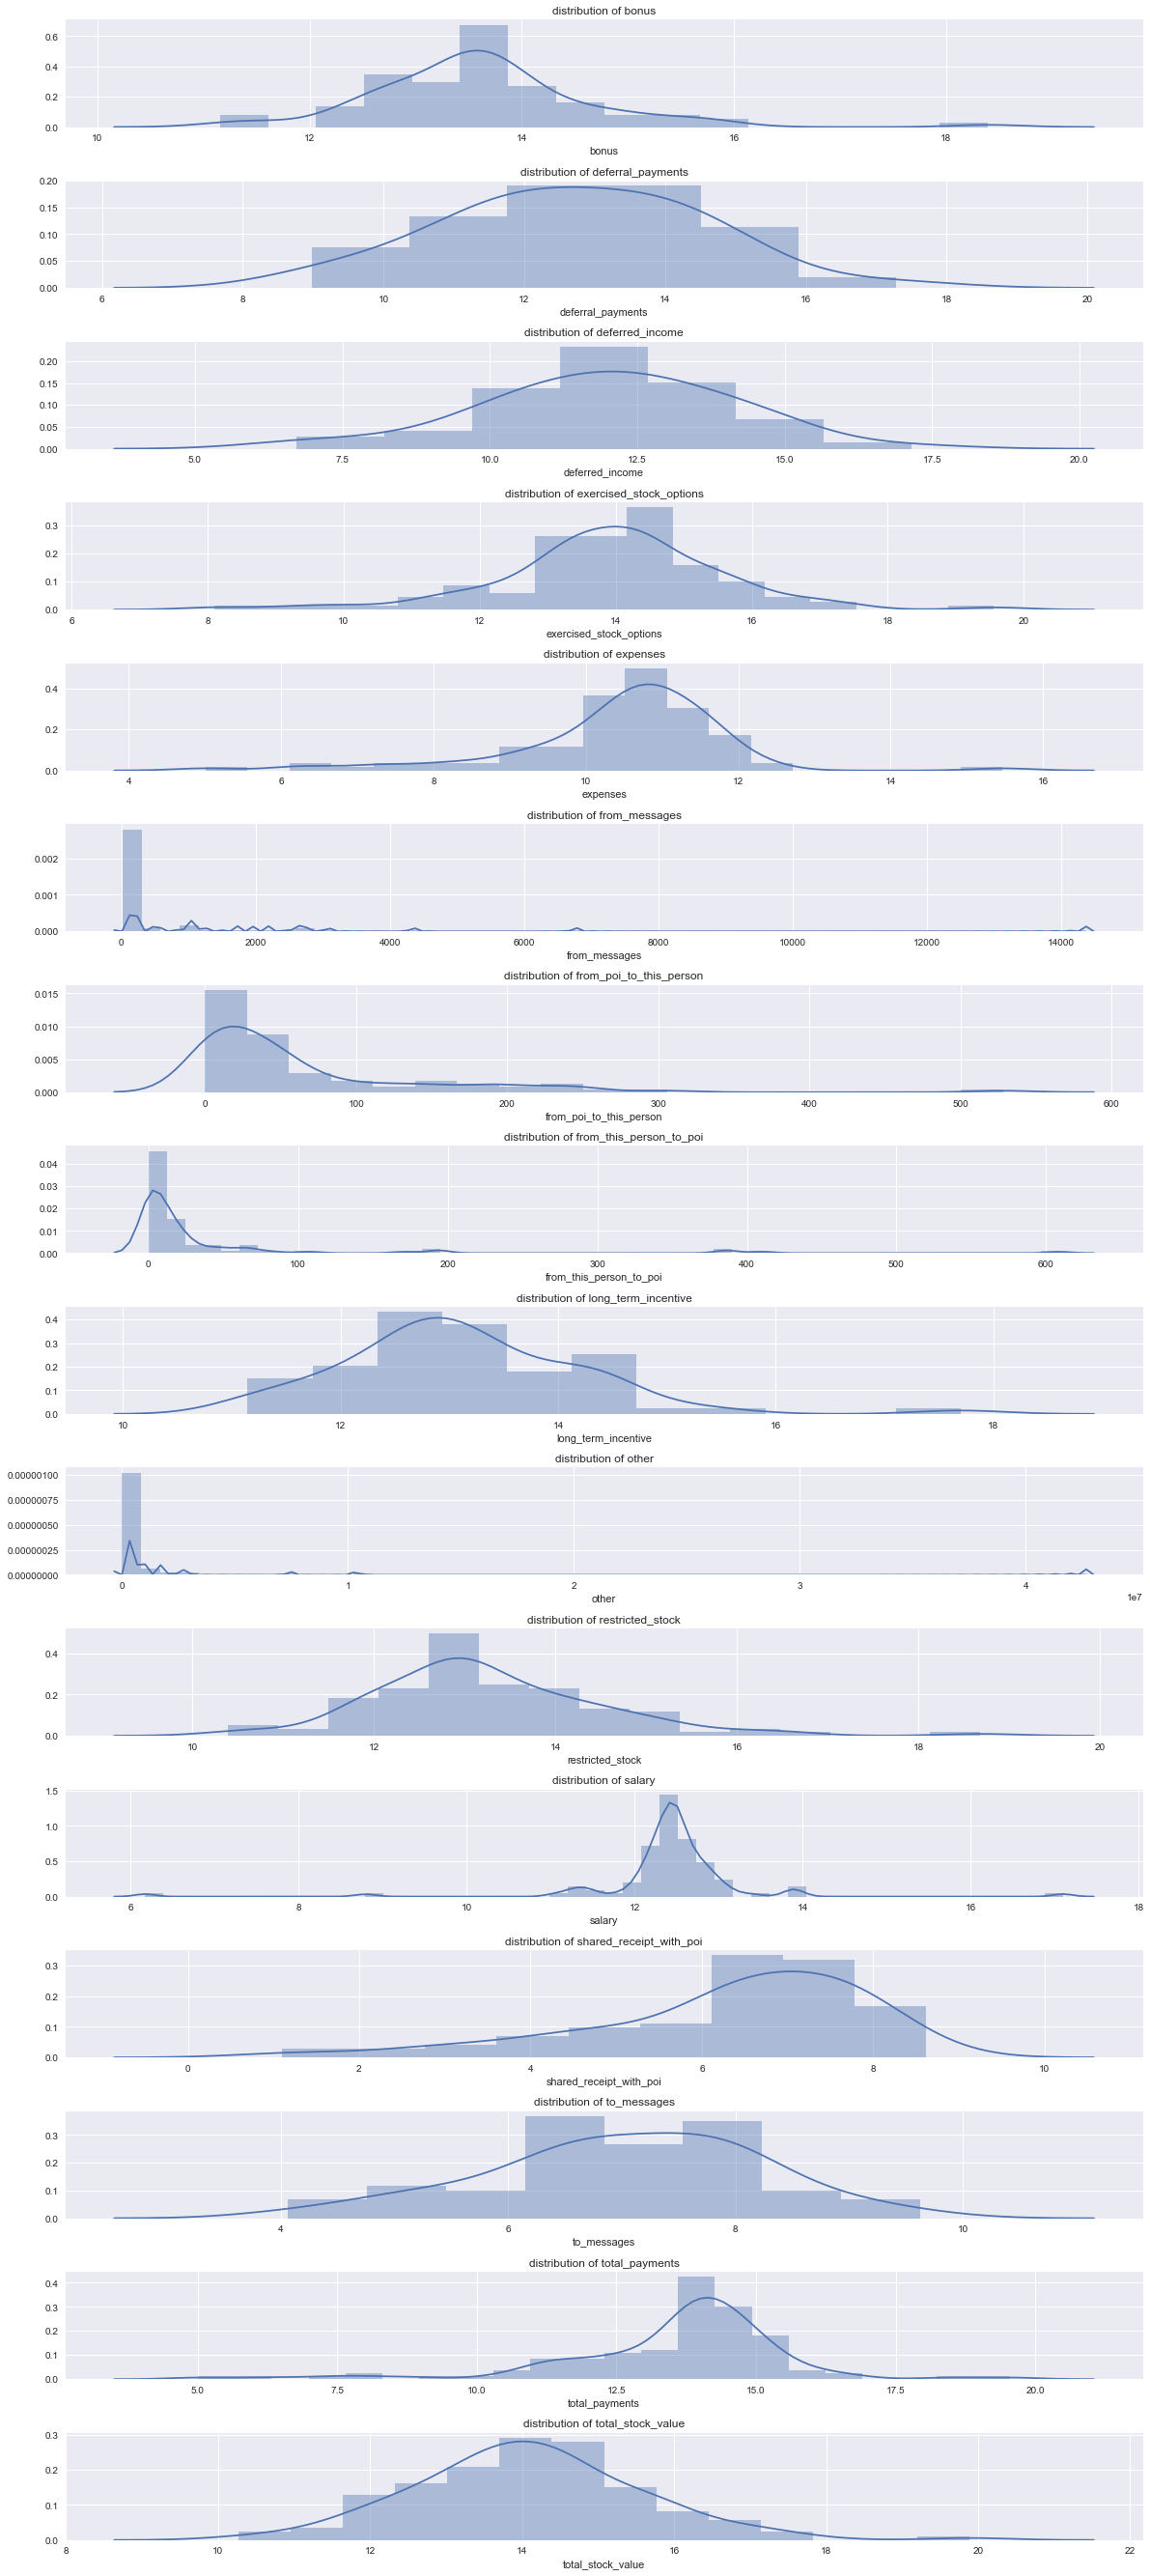

In [10]:
fig_num = 16
plt.figure(figsize=(20,fig_num*3))
plt.subplots_adjust(hspace=0.5)
index = 1
for col in df:
    plt.subplot(fig_num,1,index)
    plt.title("distribution of "+col)
    sns.distplot(df[col].dropna())
    index += 1
plt.show()

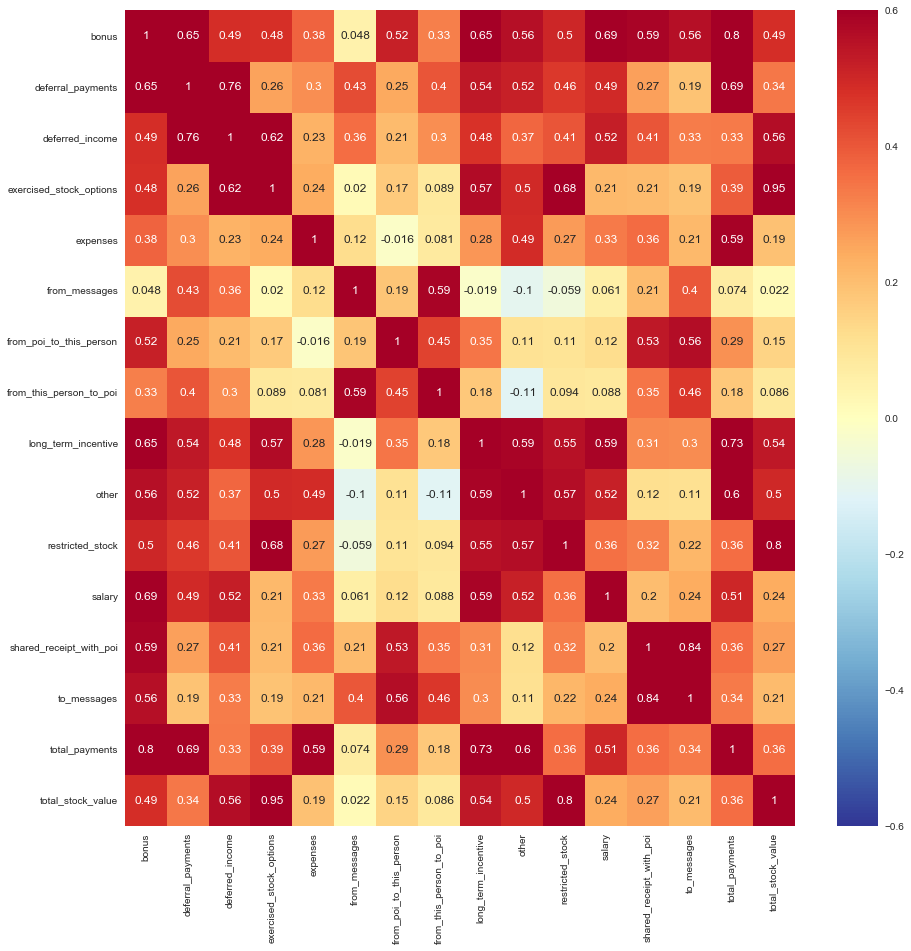

In [11]:

plt.figure(figsize=(15,15))
heatmap = sns.heatmap(all_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

plt.show()

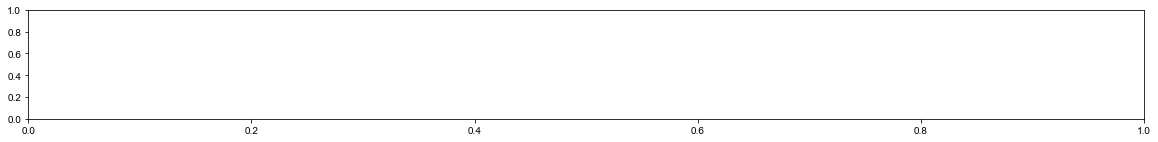

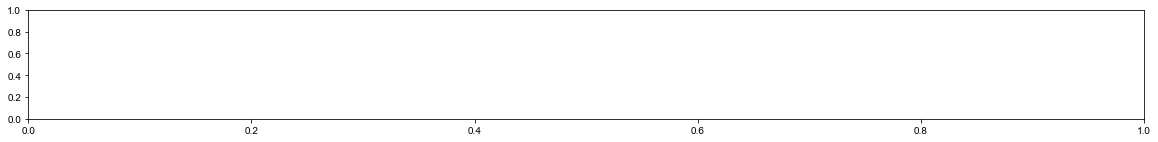

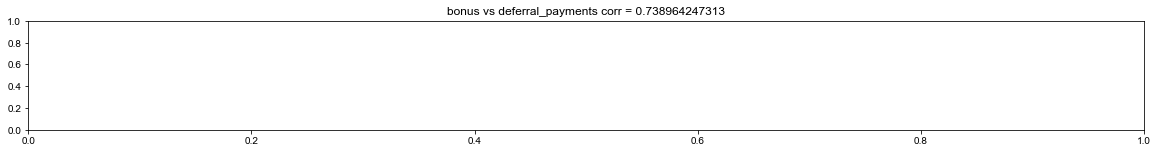

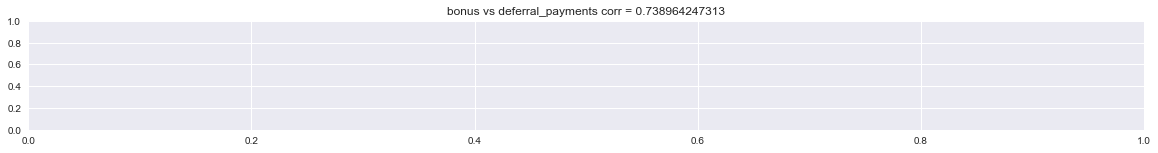

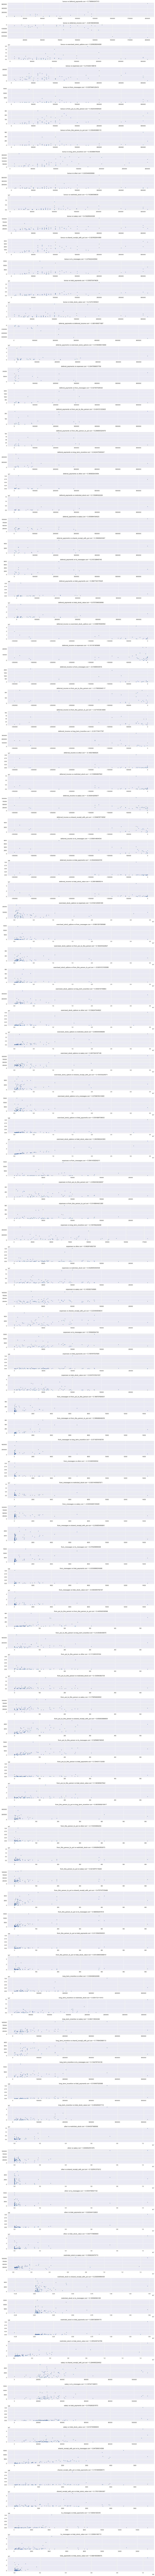

In [17]:
#import seaborn as sns
fig_num = 8*15 
plt.figure(figsize=(20,fig_num*3))
plt.subplots_adjust(hspace=0.5)
index = 1
for i in range(len(list(df))):
    for j in range(len(list(df))):
        if j > i:
            plt.subplot(fig_num,1,index)
            plt.title(list(df)[i]+' vs '+list(df)[j]+' corr = '+str(all_corr.iloc[i,j]))
            #sns.kdeplot(df.iloc[:,i],df.iloc[:,j])
            plt.plot(df.iloc[:,i],df.iloc[:,j],'.')
            index += 1
plt.show()

In [12]:
df1 = df.fillna(df.mean())
df_temp = MinMaxScaler().fit_transform(df1)
train_X = df_temp[:train_num]
test_X = df_temp[train_num:]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
estimator.fit(train_X,train_Y)
y_hat = estimator.predict(test_X)
#print(test_X)
print(y_hat)
y_prob1 = estimator.predict_proba(test_X)[:,1]
print(y_prob1)
print(df1.shape)
df1

0.885375494071
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[ 0.0854016   0.13618544  0.13531919  0.09713349  0.13662153  0.11915732
  0.11176054  0.11051068  0.12741585  0.16512198  0.11157679  0.12309838
  0.13048857  0.13384901  0.13977274  0.10338716  0.10577453  0.13244531
  0.10052582  0.10987794  0.12474271  0.1327434   0.12131938  0.12544163
  0.10664953  0.12584716  0.13156174  0.15483239  0.12609332  0.133241
  0.13321433  0.1381761   0.12512123]
(146, 16)


,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,14.375127,12.710154,15.069526,16.800898,10.756860,18.000000,42.000000,4.000000,14.296091,1.748390e+05,14.826517,12.949526,6.762730,6.809039,13.132415,16.930915
1,15.538277,12.710154,11.985307,16.773022,10.286605,108.000000,88.000000,30.000000,14.467836,2.212200e+04,15.738835,13.921004,7.622175,8.196437,15.976845,17.077203
2,12.206078,12.710154,8.335192,14.300647,10.038237,39.000000,13.000000,14.000000,13.125752,1.573324e+06,13.675353,12.263610,4.521789,5.420535,14.510599,14.729245
3,13.592368,12.710154,11.985307,13.926652,11.679583,608.790698,64.895349,41.232558,13.309128,9.075020e+05,13.800430,12.320766,6.286475,7.018999,14.791056,13.800430
4,14.038655,12.710154,12.478010,13.926652,10.486234,144.000000,199.000000,25.000000,12.835494,4.860000e+02,11.744259,12.389186,7.691200,7.862882,14.309779,11.744259
5,13.617907,9.236008,11.985307,17.241923,11.264195,608.790698,64.895349,41.232558,13.125752,2.856000e+03,13.250323,12.402717,6.286475,7.018999,11.419647,17.241923
6,13.617907,12.710154,11.985307,15.932796,10.895776,608.790698,64.895349,41.232558,13.125752,1.479500e+05,15.089813,11.972904,6.286475,7.018999,12.794695,16.290767
7,13.997833,10.225970,11.878006,13.926652,9.712024,40.000000,240.000000,11.000000,13.125752,1.017400e+05,13.456322,12.572599,7.032624,7.472501,14.214518,13.456322
8,15.761421,12.220528,12.611541,17.352066,11.511254,36.000000,123.000000,16.000000,15.096445,1.035973e+07,16.507546,13.885337,7.788212,8.360305,18.455660,17.709575
9,13.304687,12.710154,11.985307,12.860294,11.743871,16.000000,52.000000,6.000000,11.170773,2.003080e+05,12.883647,12.524439,6.774224,6.773080,14.056325,13.565185


In [13]:
# df1 = df.fillna(df.mean())
# df_temp = MinMaxScaler().fit_transform(df1)
# train_X = df_temp[:train_num]
# test_X = df_temp[train_num:]
# estimator = GradientBoostingClassifier()
# print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
# estimator.fit(train_X,train_Y)
# y_hat = estimator.predict(test_X)
# #print(test_X)
# print(y_hat)
# y_prob2 = estimator.predict_proba(test_X)[:,1]
# print(y_prob2)

In [14]:
# df1 = df.fillna(df.mean())
# df_temp = StandardScaler().fit_transform(df1)
# train_X = df_temp[:train_num]
# test_X = df_temp[train_num:]
# estimator = RandomForestClassifier()
# print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
# estimator.fit(train_X,train_Y)
# y_hat = estimator.predict(test_X)
# #print(test_X)
# print(y_hat)
# y_prob3 = estimator.predict_proba(test_X)[:,1]
# print(y_prob3)

In [15]:
y_pred_df = pd.DataFrame(data={'name':test_name.values,'poi':y_prob1})
y_pred_df.to_csv('02_17_5.csv',index=None)

In [16]:
y_pred_df

,name,poi
0,BELDEN TIMOTHY N,0.085402
1,BOWEN JR RAYMOND M,0.136185
2,HANNON KEVIN P,0.135319
3,DELAINEY DAVID W,0.097133
4,CAUSEY RICHARD A,0.136622
5,HICKERSON GARY J,0.119157
6,FREVERT MARK A,0.111761
7,CHAN RONNIE,0.110511
8,DONAHUE JR JEFFREY M,0.127416
9,REYNOLDS LAWRENCE,0.165122


In [ ]:
print(X_test.shape)
print(y_pred.shape)

# vocabulary
* repayment: 貸款的還款
* loan advances: 貸款預付款
* promissory note: 本票
* severance: 遣散